In [27]:
import pandas as pd

df = pd.read_csv("cleaned_cancer_data.csv")
df.head()

,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,Breast,68,0,7,2,8,0,5,3,7,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,Prostate,74,1,8,9,8,0,0,3,7,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,Skin,55,1,7,10,7,0,3,3,4,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,Colon,61,0,6,2,2,0,6,2,4,6,4,8,0,0,8,0.318449,32.1,7,Low
4,Lung,67,1,10,7,4,0,6,3,10,9,10,9,0,0,5,0.524358,25.1,2,Medium


In [28]:
# Use Risk_Level as target (the dataset's primary objective)
target_col = "Risk_Level"

# Drop columns with data leakage
cols_to_drop = [
    target_col,           # Target variable
    "Cancer_Type",        # For diagnosed cases only
    "Overall_Risk_Score"  # Computed from other features (data leakage)
]

y = df[target_col]
X = df.drop(columns=cols_to_drop)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [30]:
# Scale features (important for features with different ranges like BMI)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    bootstrap=True,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
print("Train:", rf.score(X_train_scaled, y_train))
print("Test :", rf.score(X_test_scaled, y_test))
print("\nClassification Report:")
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

Train: 0.975625
Test : 0.845

Classification Report:
              precision    recall  f1-score   support

        High       0.55      0.30      0.39        20
         Low       0.69      0.62      0.65        65
      Medium       0.88      0.93      0.90       315

    accuracy                           0.84       400
   macro avg       0.71      0.61      0.65       400
weighted avg       0.83      0.84      0.84       400



In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 📊 Model Performance Visualizations

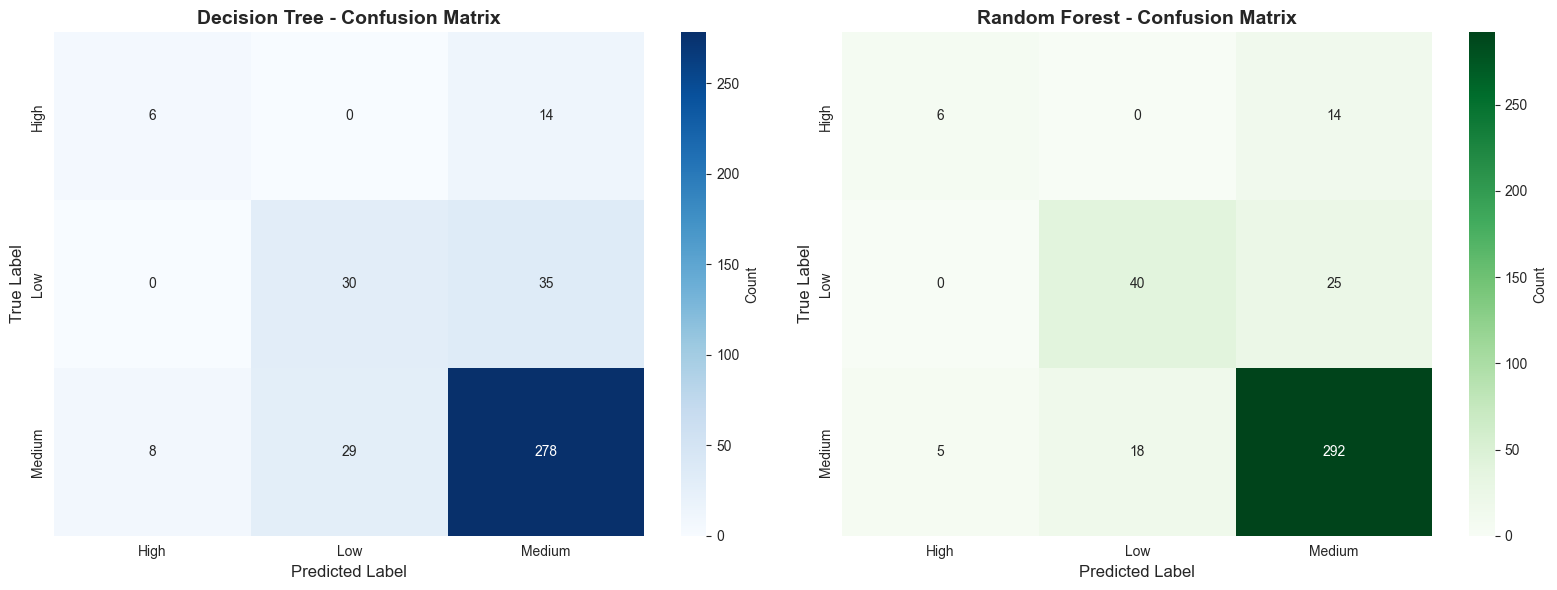

In [33]:
from sklearn.metrics import confusion_matrix

# Confusion Matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['High', 'Low', 'Medium'], 
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['High', 'Low', 'Medium'], 
            yticklabels=['High', 'Low', 'Medium'],
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

C:\Users\Musallam\AppData\Local\Temp\ipykernel_7472\2658690785.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


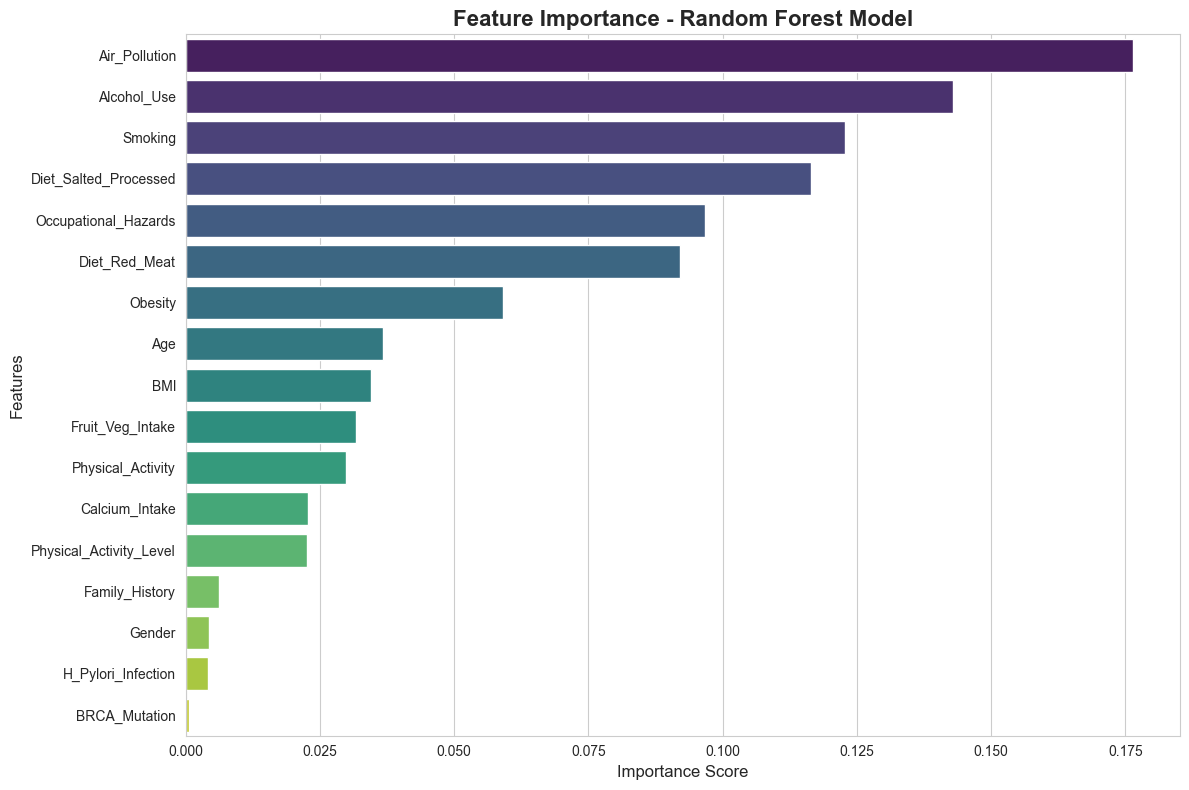


Top 5 Most Important Features:
                  Feature  Importance
10          Air_Pollution    0.176376
3             Alcohol_Use    0.142979
2                 Smoking    0.122706
7   Diet_Salted_Processed    0.116546
11   Occupational_Hazards    0.096775


In [34]:
# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest Model', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

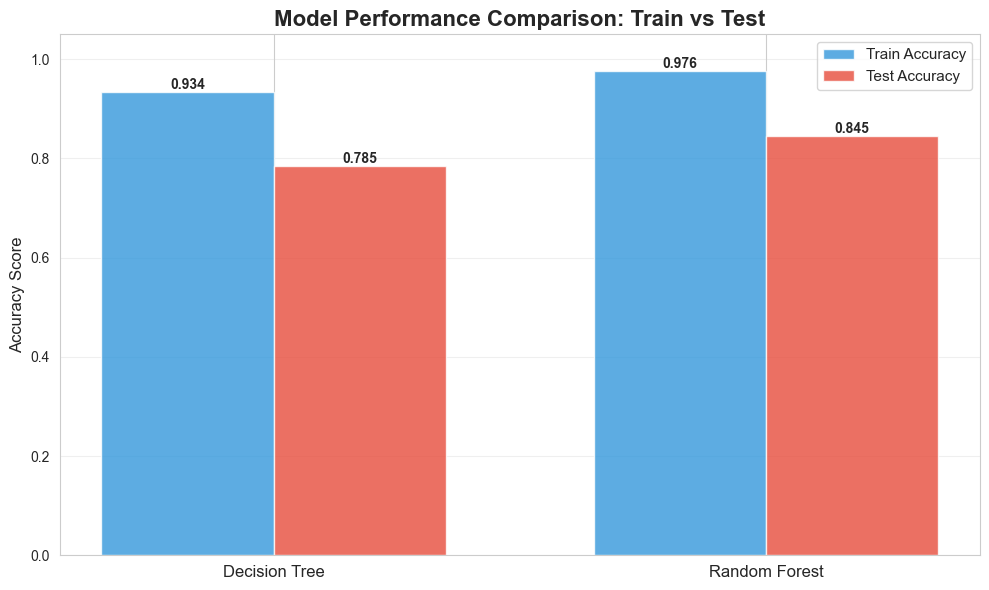

In [35]:
# Model Comparison - Train vs Test Accuracy
models = ['Decision Tree', 'Random Forest']
train_scores = [clf.score(X_train_scaled, y_train), rf.score(X_train_scaled, y_train)]
test_scores = [clf.score(X_test_scaled, y_test), rf.score(X_test_scaled, y_test)]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Accuracy', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy', color='#e74c3c', alpha=0.8)

ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('Model Performance Comparison: Train vs Test', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

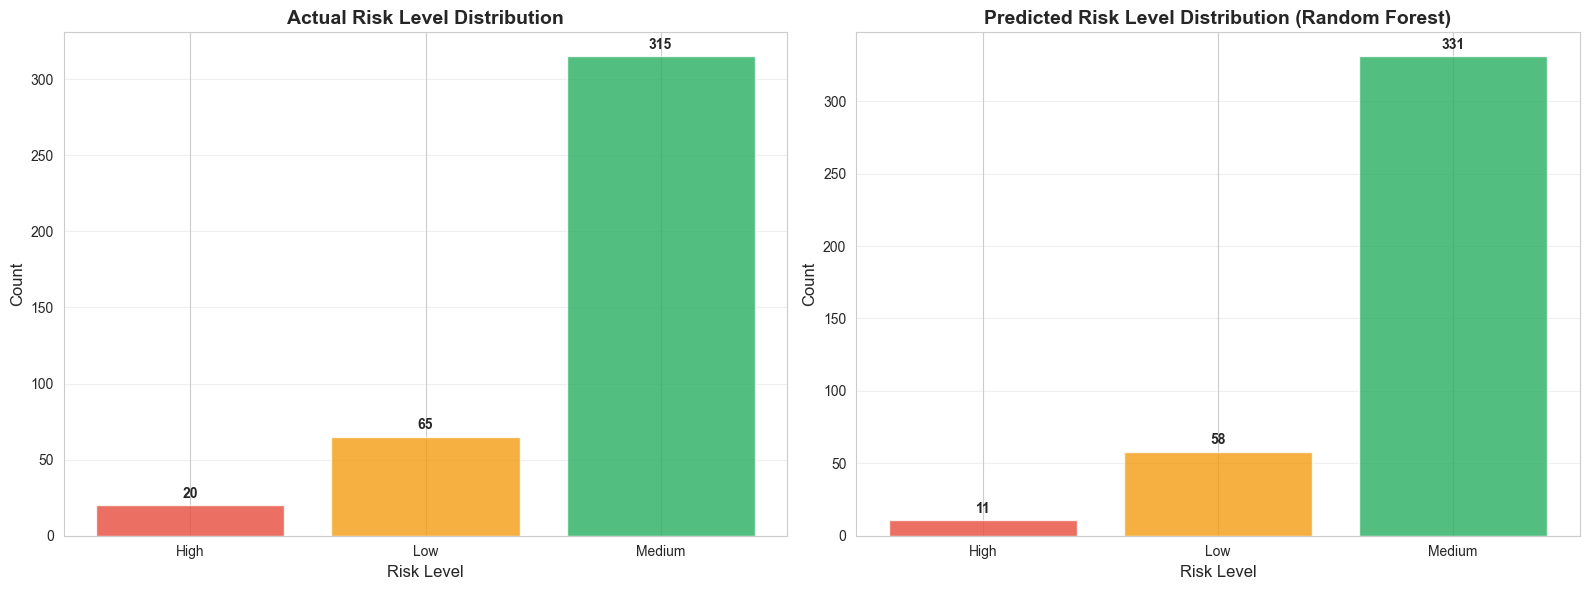

In [36]:
# Prediction Distribution - Actual vs Predicted (Random Forest)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual distribution
actual_counts = y_test.value_counts().sort_index()
axes[0].bar(actual_counts.index, actual_counts.values, color=['#e74c3c', '#f39c12', '#27ae60'], alpha=0.8)
axes[0].set_title('Actual Risk Level Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risk Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(actual_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Predicted distribution
pred_counts = pd.Series(y_pred_rf).value_counts().sort_index()
axes[1].bar(pred_counts.index, pred_counts.values, color=['#e74c3c', '#f39c12', '#27ae60'], alpha=0.8)
axes[1].set_title('Predicted Risk Level Distribution (Random Forest)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Risk Level', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(pred_counts.values):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

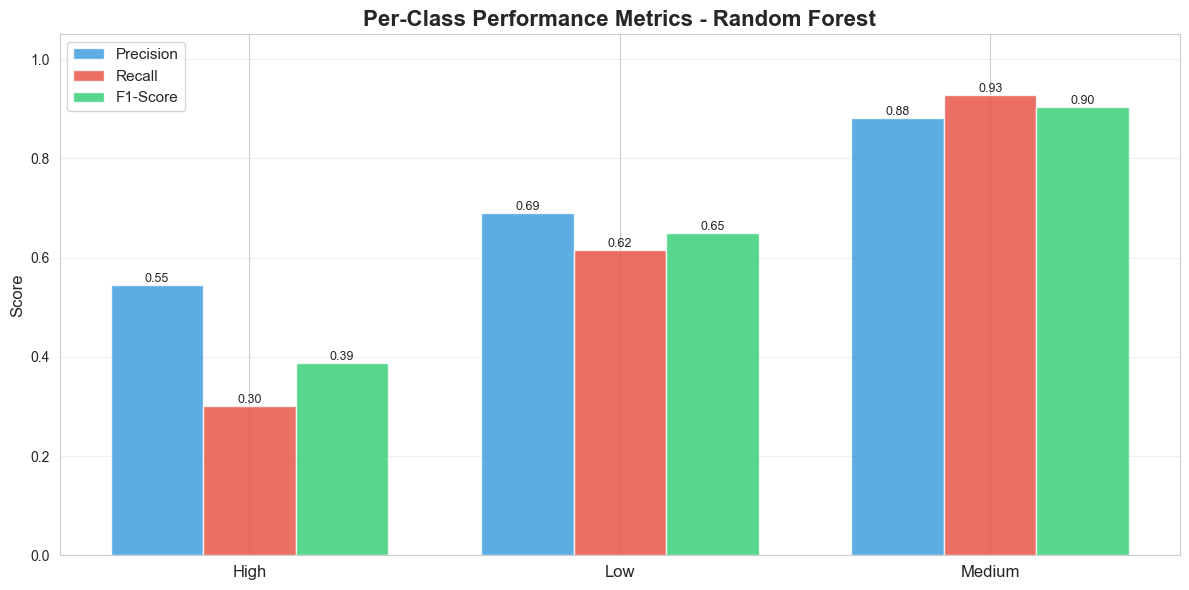

In [37]:
# Per-Class Performance Metrics (Random Forest)
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_rf, labels=['High', 'Low', 'Medium'])

metrics_df = pd.DataFrame({
    'Risk Level': ['High', 'Low', 'Medium'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Create grouped bar chart
x = np.arange(len(metrics_df['Risk Level']))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, metrics_df['Precision'], width, label='Precision', color='#3498db', alpha=0.8)
bars2 = ax.bar(x, metrics_df['Recall'], width, label='Recall', color='#e74c3c', alpha=0.8)
bars3 = ax.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', color='#2ecc71', alpha=0.8)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Per-Class Performance Metrics - Random Forest', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Risk Level'], fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 📝 Key Insights Summary

The visualizations above show:

1. **Confusion Matrices**: How well each model predicts each risk level
2. **Feature Importance**: Which factors contribute most to cancer risk prediction
3. **Model Comparison**: Random Forest performs better and has less overfitting
4. **Distribution Analysis**: How predictions compare to actual risk levels
5. **Per-Class Metrics**: Performance breakdown for High/Low/Medium risk levels